# 제 6장 머신러닝-지도학습
#### [깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%A0%9C6%EC%9E%A5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5)
#### 가상환경에서 패키지 설치 방법
1. Anaconda Prompt (anaconda3) 접속
2. 가상환경 활성화 
    - activate <가상환경 이름(adp_code)>
3. 가상환경이 활성화된 상태에서 패키지 설치
    - pip install <패키지 이름>==<버전>

### 단순 선형 회귀
- 성능 평가 지표 MSE(평균 제곱 오차) 값이 최소화 되는 파라미터(기울기, 절편)를 찾음.
- 통계적 방식의 회귀분석은 정규방정식을 사용해 문제를 해결하지만 머신러닝 모델은 경사하강법을 사용해 문제를 해결함.

#### 정규방정식

In [1]:
import warnings
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.shape

(1338, 7)

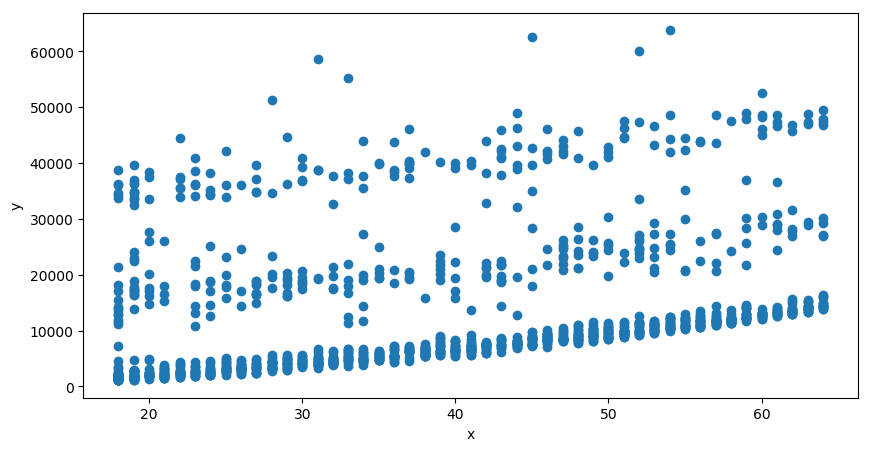

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(x=data.age, y=data.charges)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
x = np.array(data.age)
y = np.array(data.charges)
x = x.reshape(1338, 1)
y = y.reshape(1338, 1) # 차원 맞추기
lr = LinearRegression()
lr.fit(x, y)

print('선현 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)
print(lr.score(x, y)) # 결정계수

선현 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]
0.08940589967885804


In [15]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


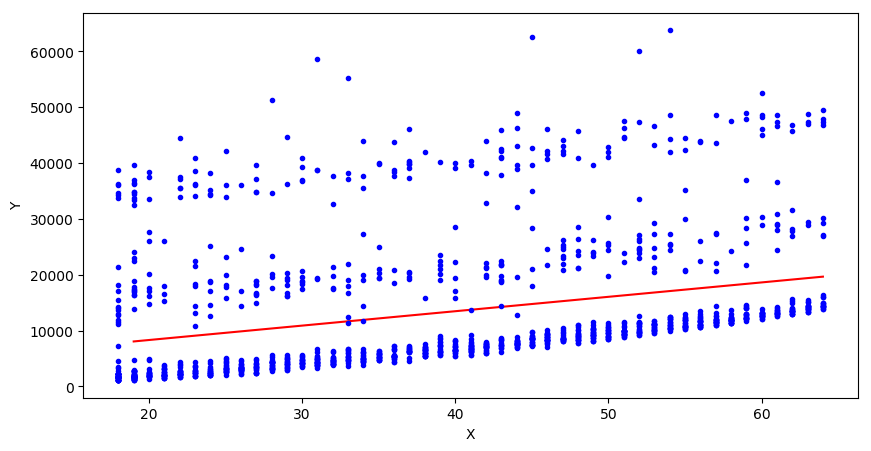

In [16]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### 경사하강법

In [26]:
import warnings
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv')

x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(1338 ,1) 
y=y.reshape(1338 ,1) # .reshape()으로 차원 맞추기

sgd_reg =SGDRegressor(max_iter=1000, random_state=34) # 학습 횟수 1000
sgd_reg.fit(x,y.ravel()) # 1차원으로 flatten

SGDRegressor(random_state=34)

In [27]:
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [9057.21833765] 계수 [484.13243757]


In [28]:
x_new=[[19],[64]]
y_hat=sgd_reg.predict(x_new)
print(y_hat)

[18255.73465154 40041.69434233]


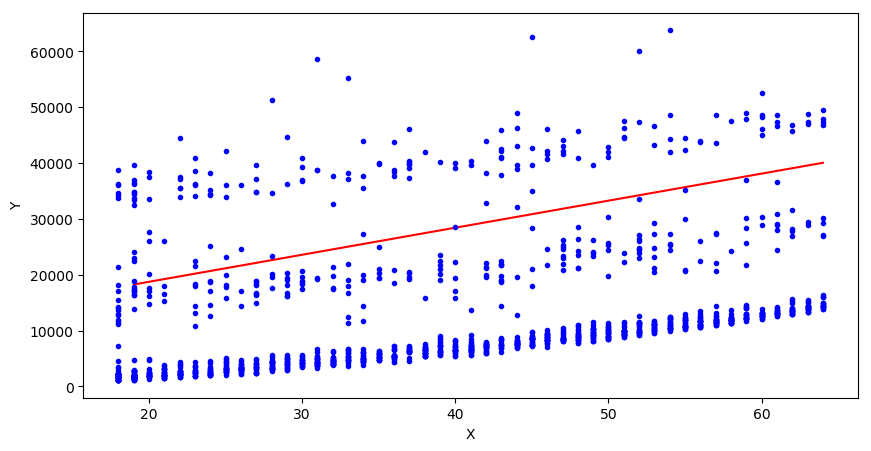

In [29]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 다항 회귀

In [30]:
import pandas as pd
cereal = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [31]:
# 전처리
cereal = cereal[cereal.columns[3:]] # 범주형 변수 제외
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


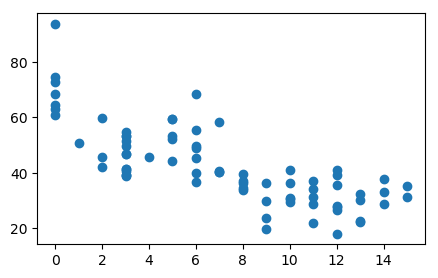

In [38]:
# 산점도
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.figure(figsize=(5,3))
plt.scatter(x, y)
plt.show()

In [40]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [46]:
# 다항 변수 생성
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 2차원
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))

# 모델 학습
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [53]:
# 학습된 모델로 예측값 계산
X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
pred = reg.predict(X_test_poly)

np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1),
                    y_test.reshape(len(y_test),1)),
                     axis=1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [59]:
# 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test_poly, y_test) # accuracy_score 메서드는 분류 문제에서 사용 가능함.
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


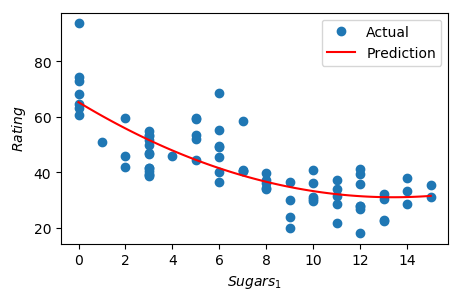

In [70]:
# 다항 회귀 분석 결과 시각화
X_new = np.linspace(0, 15, 100).reshape(100, 1)
X_new_poly = poly_reg.transform(X_new) # 2차항
y_new = reg.predict(X_new_poly)

plt.figure(figsize=(5,3))
plt.plot(x,y, 'o', label ='Actual')
plt.plot(X_new, y_new, 'r-', label ='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

#### 고차 다항 회귀 분석

In [76]:
X = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [81]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)

reg =LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression()

In [83]:
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test_poly, y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	9.315
MAE	2.159
RMSE	3.052
ACC	92.855%


### 다중 회귀 - Ridge

In [3]:
# 데이터 불러오기
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [14]:
from sklearn.linear_model import Ridge
alpha = np.logspace(-3, 1, 5, base=10) # (start, stop, num, base) 

data=[]
for a in alpha:
    ridge = Ridge(alpha=a, random_state=45)
    ridge.fit(x,y)
    data.append(pd.Series(np.hstack([ridge.coef_])))    
df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns=x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


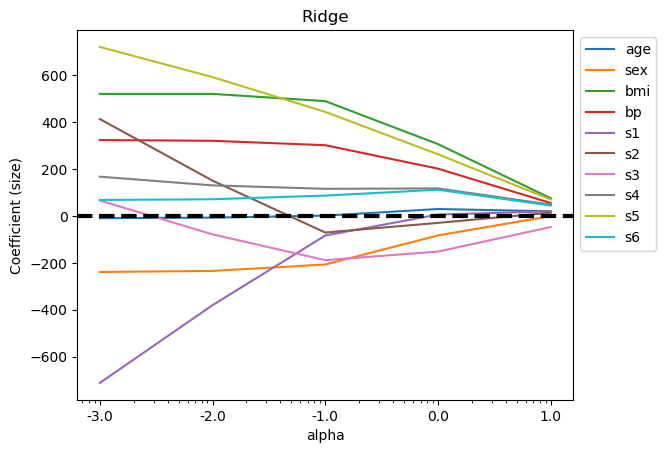

In [15]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

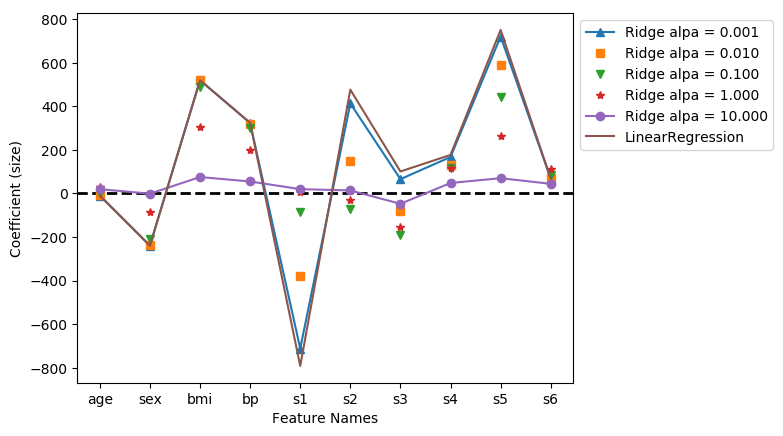

In [20]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x,y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label='Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpa = 10.000')

plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

### 다중 회귀 - Lasso

In [16]:
from sklearn.linear_model import Lasso
alpha=np.logspace(-3,1,5)

data=[]
for a in alpha:
    lasso = Lasso(alpha=a, random_state=45)
    lasso.fit(x,y)
    data.append(pd.Series(np.hstack([lasso.coef_])))    
df_lasso=pd.DataFrame(data, index=alpha)
df_lasso.columns=x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


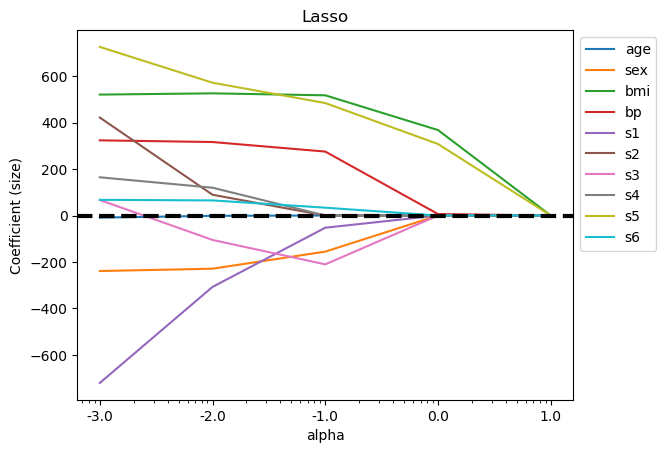

In [18]:
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

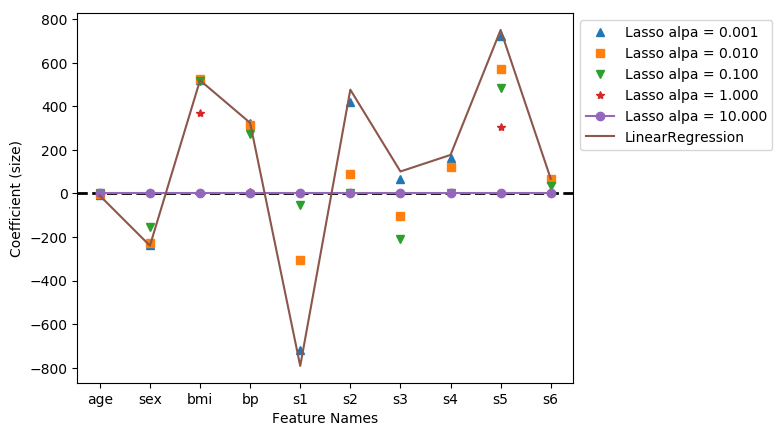

In [21]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^', label='Lasso alpa = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpa = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpa = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpa = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

### 다항 회귀 - ElasticnNet

In [27]:
from sklearn.linear_model import ElasticNet

alpha=np.logspace(-3, 1, 5)

data=[]
for i, a in enumerate(alpha):
    ela=ElasticNet(alpha=a, l1_ratio=0.5)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela=pd.DataFrame(data, index=alpha)
df_ela.columns=x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.705295,-178.076275,450.881224,281.072686,-44.049984,-77.944846,-188.958313,119.794742,393.703478,98.943695
0.010,33.147202,-35.245609,211.023930,144.560115,21.931533,0.000000,-115.620017,100.658838,185.326334,96.257214
0.100,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
1.000,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


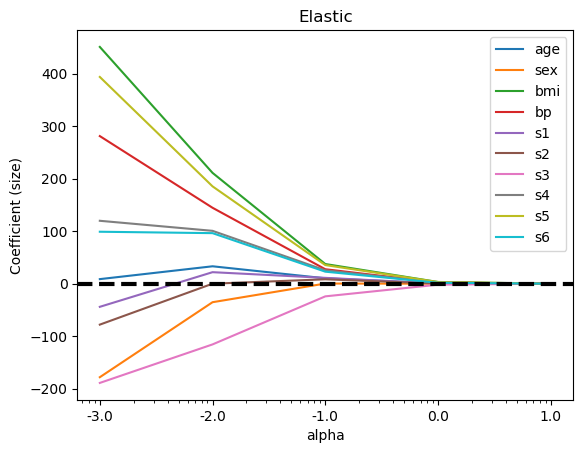

In [28]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

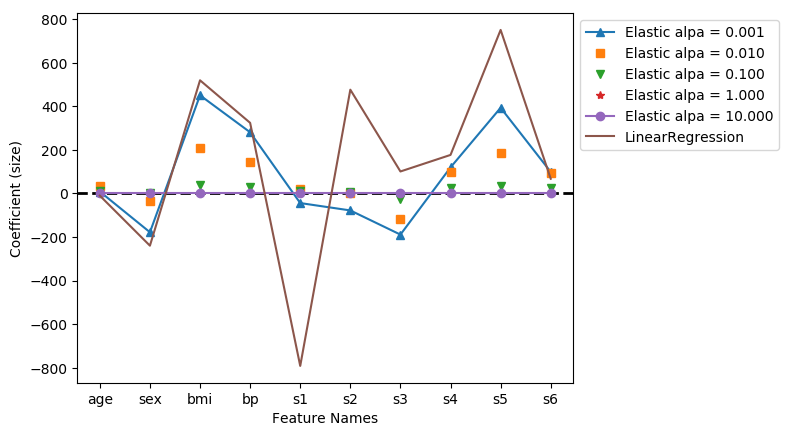

In [29]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpa = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpa = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpa = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpa = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))

### 로지스틱 회귀분석

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv')
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [20]:
body['gender']=np.where(body['gender']=='M', 0, 1)
body['class_1']=np.where(body['class']=='A', 1, 0)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0


In [23]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  int32  
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
 12  class_1                  13393 non-null  int32  
dtypes: float64(10), int32(2), object(1)
memory usage: 1.2+ MB


In [21]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))
x=body[feature_columns]
y=body['class_1']

X_train, X_test, y_train, y_test=train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)
print(X_train.shape, test_x.shape, y_train.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [31]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression(random_state=45, solver='liblinear')
logR.fit(X_train, y_train)

LogisticRegression(random_state=45, solver='liblinear')

In [32]:
proba=pd.DataFrame(logR.predict_proba(X_train))
cs = logR.decision_function(X_train)

df=pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A','A', 'decision_function'] # Not A: class 0 / A: class 1

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision_function
0,1.000000,2.597329e-08,-17.466197
1,1.000000,1.771152e-07,-15.546465
2,1.000000,3.334652e-07,-14.913727
3,1.000000,3.342365e-07,-14.911417
4,1.000000,3.592846e-07,-14.839151
...,...,...,...
9370,0.001936,9.980645e-01,6.245433
9371,0.001732,9.982679e-01,6.356697
9372,0.001542,9.984583e-01,6.473348
9373,0.000505,9.994954e-01,7.591331


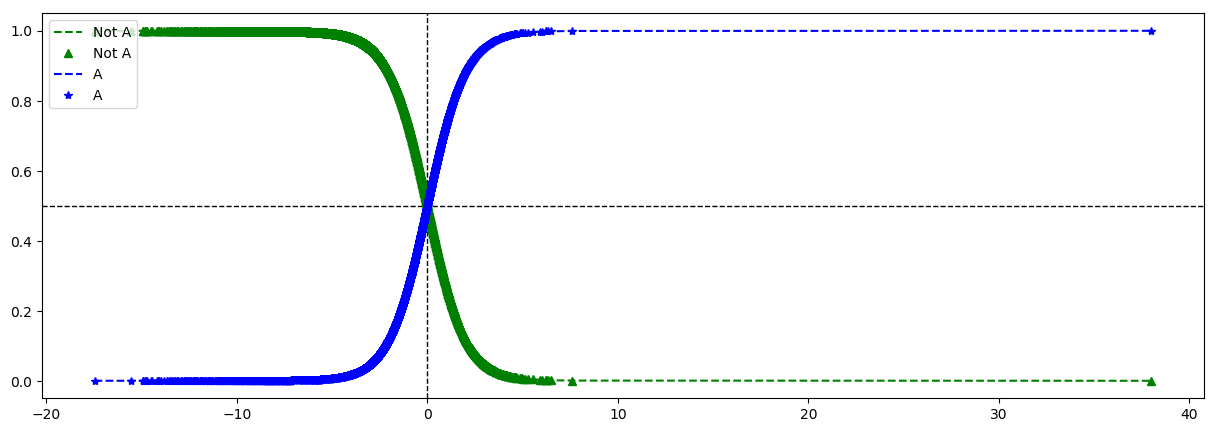

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(X_test)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y, pred)
test_rcll=recall_score(test_y, pred)
test_f1=f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[2768  246]
 [ 350  654]]


정확도	85.17%
정밀도	72.67%
재현율	65.14%
F1	68.7%


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# RocCurveDisplay.from_estimator(logR, X_test, y_test) # 0.24 버전 이상부터 가능
# plt.show()

### 다중 클래스 분류 - 소프트맥스 회귀(=다항 로지스틱 회귀)

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
body=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
# 전처리
body.gender = np.where(body.gender == 'M', 0, 1)
mapping = {'A':0, 'B':1, 'C':2, 'D':3}
body['class_2'] = body['class'].map(mapping)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [4]:
from sklearn.model_selection import train_test_split
feature_columns = body.columns.difference(['class', 'class_2'])
x = body[feature_columns]
y = body['class_2']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [6]:
from sklearn.linear_model import LogisticRegression
softm = LogisticRegression(multi_class='multinomial', solver='sag', C=10, random_state=45)
softm.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=45,
                   solver='sag')

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred = softm.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))

[[707 263  34   0]
 [270 401 300  33]
 [ 95 199 527 184]
 [ 11  62 157 775]]


정확도	59.98%


In [19]:
print(softm.predict([X_test.iloc[-1,:]])) # 해당 데이터 샘플이 속할 클래스 반환
print(softm.predict_proba([X_test.iloc[-1, :]])) # 해당 데이터 샘플이 각 클래스에 속할 확률 반환

[0]
[[0.6204849  0.31532347 0.0625933  0.00159834]]


### 서포트 벡터 머신(LinearSVC)

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv')
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


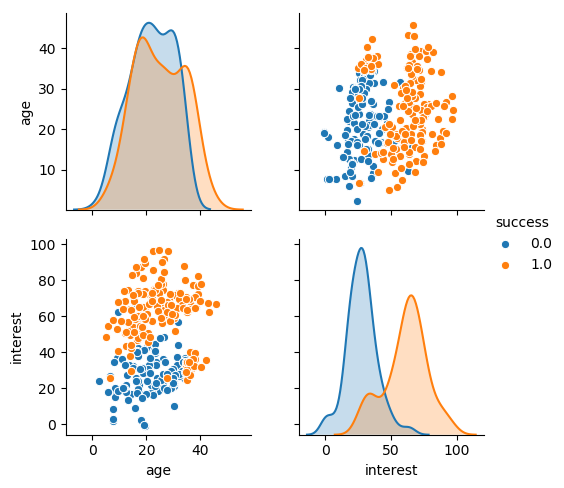

In [70]:
 sns.pairplot(hue='success', data=c, vars=['age', 'interest'])

In [71]:
from sklearn.model_selection import train_test_split

x=c[['age', 'interest']]
y=c['success']

train_x, test_x, train_y, test_y = train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


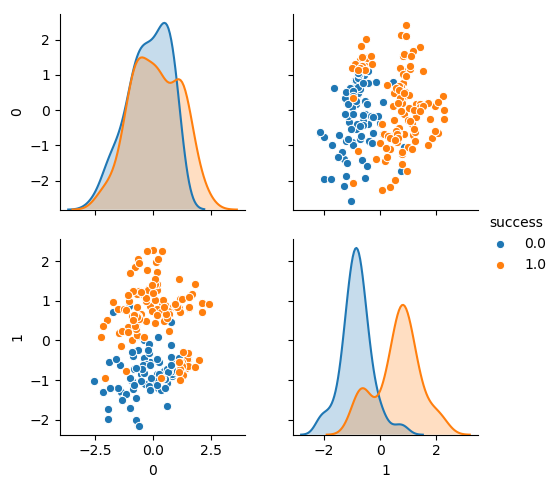

In [72]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1),
             hue='success', vars=[0, 1])

In [73]:
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(train_x, train_y)

SVC(C=0.5)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)
pred=clf.predict(test_x_scal)
test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y, pred)
test_rcll=recall_score(test_y, pred)
test_f1=f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


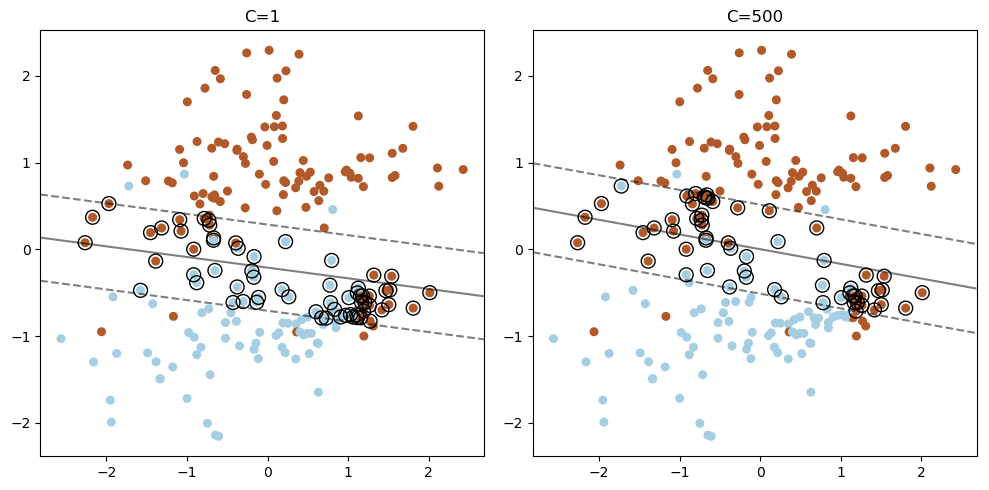

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y)
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(train_x)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vector_indices]

    plt.subplot(1, 2, i +1)
    plt.scatter(train_x[:, 0], train_x[:, 1], c =train_y, s =30, cmap =plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()

### 서포트 벡터 머신(SVR)

In [76]:
import numpy as np

# 샘플 데이터 생성하기
X = np.sort(5*np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X[0:5], '\n\n', y[0:10])

[[0.14221701]
 [0.14621144]
 [0.16330709]
 [0.52737642]
 [0.56375232]] 

 [0.14173809 0.14569105 0.16258218 0.50326796 0.53436163 0.54571048
 0.65152783 0.73992918 0.75244348 0.83096335]


In [78]:
# 타깃  데이터에 노이즈 추가하기
y[::5] += 3 * (.5 - np.random.rand(8))
print(y[0:10])

[-0.00380902  0.14569105  0.16258218  0.50326796  0.53436163 -0.66704028
  0.65152783  0.73992918  0.75244348  0.83096335]


In [81]:
from sklearn.svm import SVR

# 회귀 모델 적합시키기
svr_rbf = SVR(kernel='rbf', C = 100, gamma=.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C = 100, gamma='auto')
svr_poly = SVR(kernel='poly', C = 100, gamma='auto', epsilon=.1, degree=3, coef0=1)

svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [82]:
rbf_pred=svr_rbf.predict(X)
lin_pred=svr_lin.predict(X)
poly_pred=svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results=pd.DataFrame(index =kernel,columns =evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

,mse,rmse,mae
Random_Forest,0.12,0.35,0.17
Linear,0.33,0.58,0.44
Polynomial,0.13,0.36,0.19


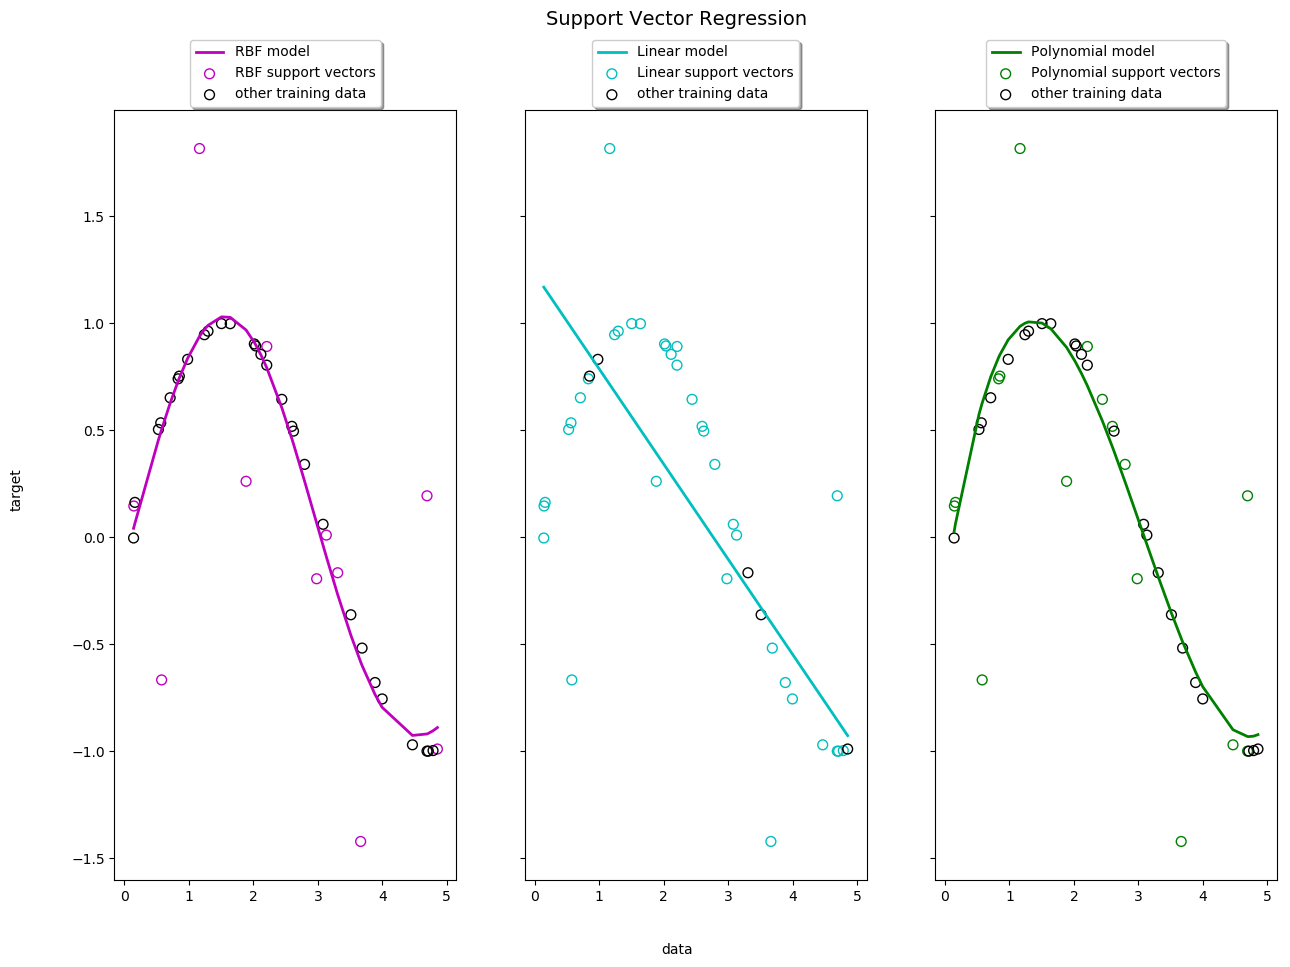

In [83]:
import matplotlib.pyplot as plt
lw =2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### K-최근접 이웃(K-NN)
#### 1. 분류

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

liver=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/indian_liver_patient.csv')
print(liver.Dataset.unique())
display(liver.head())

[1 2]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
liver.Gender = np.where(liver.Gender=='Female', 0, 1)
display(liver.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [9]:
liver.dropna(inplace=True)
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(405, 10) (174, 10) (405,) (174,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))

[[106  18]
 [ 39  11]]


정확도	67.24%
정밀도	73.1%
재현율	85.48%


#### 2. 회귀

In [24]:
# 임의의 샘플 데이터 생성
np.random.seed(0)
X = np.sort(5 * np.random.rand(400, 1), axis=0) # 400개 행과 1개 열, 0~1 사이의 균일분포를 따르는 난수
T = np.linspace(0, 5, 500)[:, np.newaxis] # 0부터 5까지 500개의 등간격으로 분할한 값을 갖는 1차원 배열을 생성한 후, 2차원 배열로 변환
y = np.sin(X).ravel()

print(X[:10])
print(T[:10])
print(y[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]


In [25]:
# 타깃 데이터에 노이즈 추가
y[::1] += 1 * (0.5 - np.random.rand(400))

In [26]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,y,train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(280, 1) (120, 1) (280,) (120,)


In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(train_x, train_y)
knn_dis.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [29]:
uni_pred=knn_uni.predict(test_x)
dis_pred=knn_dis.predict(test_x)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results=pd.DataFrame(index=weights, columns=evls)

for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


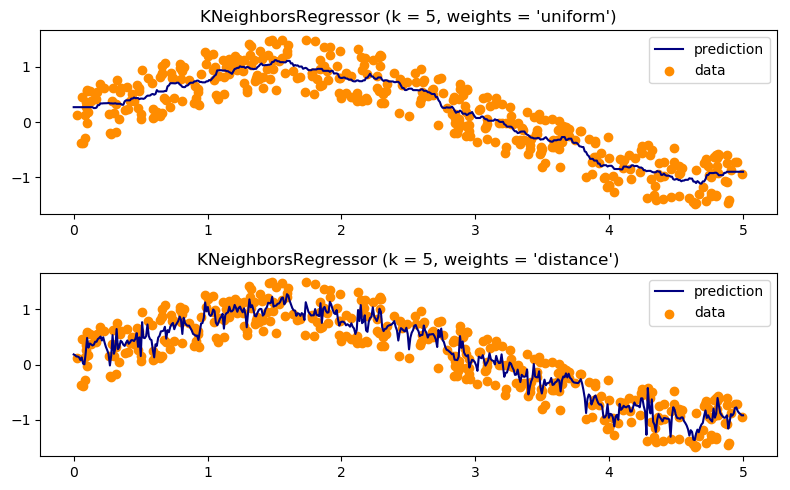

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(["uniform", "distance"]):
    knn=KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i +1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (5, weights))

plt.tight_layout()
plt.show()

### 의사결정나무
#### 분류

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

credit=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/credit_final.csv')
credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [4]:
feature_columns = credit.columns.difference(['credit.rating'])
X = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 20)
(300, 20)
(700,)
(300,)


In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(X_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))

[[ 28  62]
 [ 27 183]]


정확도	70.33%
정밀도	74.69%
재현율	87.14%


In [8]:
from sklearn.metrics import classification_report
report=classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.31      0.39        90
           1       0.75      0.87      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.70      0.68       300



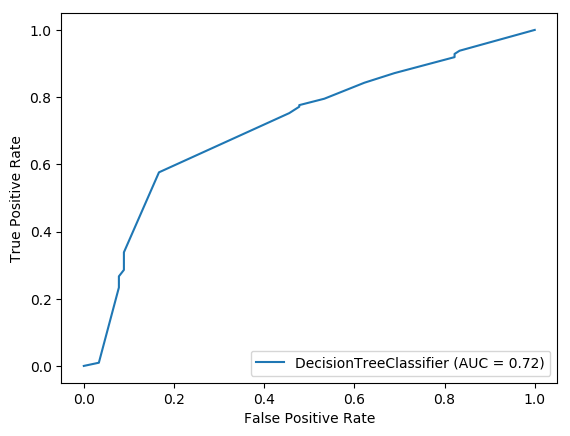

ROC_AUC_score : 0.717857142857143


In [10]:
# ROC 곡선 시각화 및 면적 계산
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf, X_test, y_test)
plt.show()
R_A_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("ROC_AUC_score :", R_A_score)

In [24]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.263282
1                              age     0.097293
2                   apartment.type     0.048656
3                     bank.credits     0.000000
4                    credit.amount     0.095584
5           credit.duration.months     0.187908
6                   credit.purpose     0.059083
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.000000
10                  foreign.worker     0.000000
11                       guarantor     0.000000
12                installment.rate     0.000000
13                  marital.status     0.016325
14                      occupation     0.000000
15                   other.credits     0.034003
16  previous.credit.payment.status     0.123825
17              residence.duration     0.020960
18                         savings     0.053080
19                       telephone     0

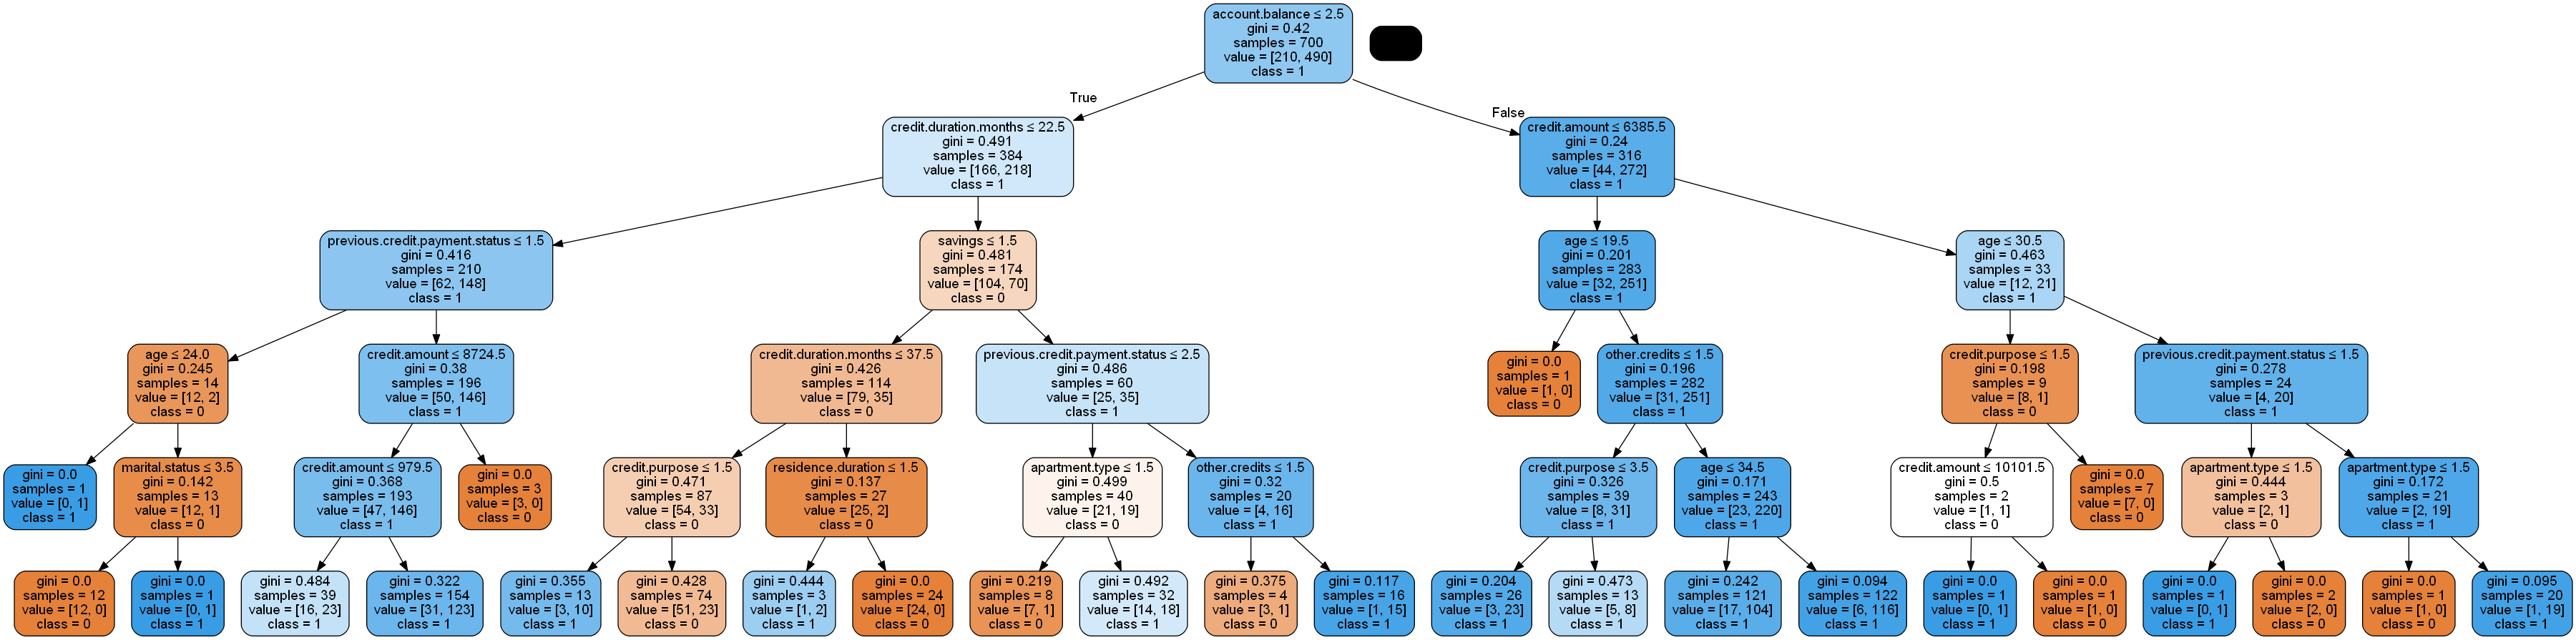

In [29]:
import numpy as np
feature_names = feature_columns
target_name = np.array(['0', '1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names=feature_names, class_names=target_name, filled=True, rounded=True,
                             special_characters=True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

#### 회귀

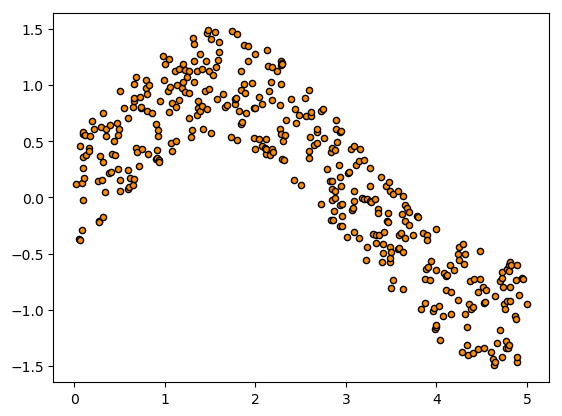

In [33]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 임의 데이터 생성하기
np.random.seed(0)
X = np.sort(5 * np.random.rand(400, 1), axis =0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

#노이즈 추가하기
y[::1] +=1 * (0.5 - np.random.rand(400))
plt.scatter(X, y, s=20, edgecolor ="black", c ="darkorange", label ="data")

In [35]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,train_size =0.7, random_state =1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

(280, 1) (120, 1) (280,) (120,)


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
y_1 = regr_1.fit(train_x, train_y).predict(test_x)
y_2 = regr_2.fit(train_x, train_y).predict(test_x)
preds = [y_1, y_2]
weights = ["max depth = 2", "max depth = 5"]
evls = ['mse', 'rmse', 'mae']
results=pd.DataFrame(index =weights,columns =evls)
for pred, nm in zip(preds, weights):
    mse = mean_squared_error(test_y, pred)
    mae = mean_absolute_error(test_y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse,2)
    results.loc[nm]['rmse']=round(rmse,2)
    results.loc[nm]['mae']=round(mae,2)

results

,mse,rmse,mae
max depth = 2,0.12,0.35,0.29
max depth = 5,0.12,0.35,0.3


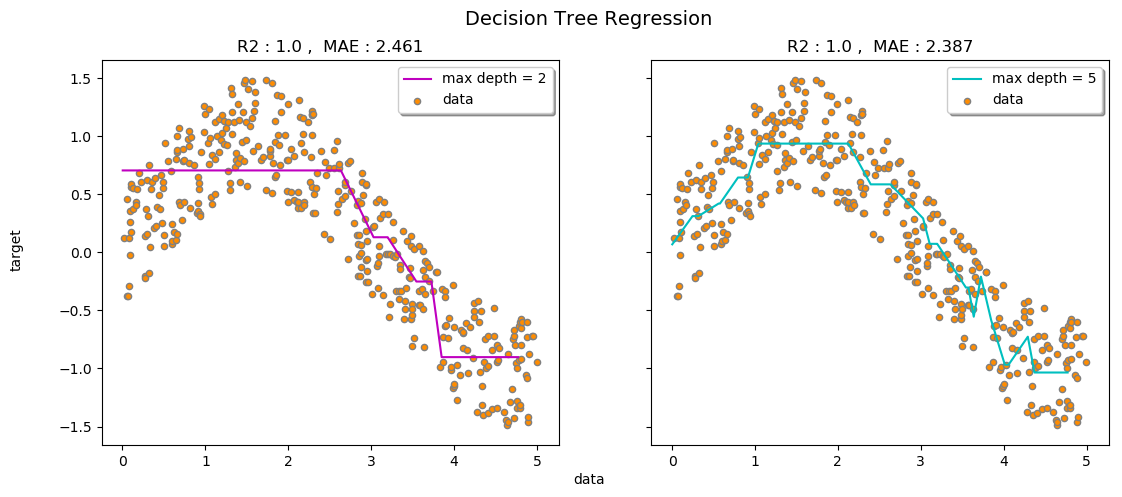

In [38]:
X_test = np.sort(5 * np.random.rand(40, 1), axis=0)

regrs=[regr_1, regr_2]
depths=["max depth = 2", "max depth = 5"]
model_color=["m", "c"]
fig, axes = plt.subplots(nrows =1, ncols =2, sharey =True, figsize =(13, 5))
for ix, regr in enumerate(regrs):
    pred = regr.fit(X,y).predict(X_test)
    r2 = regr.score(X_test, pred)
    mae=mean_absolute_error(X_test, pred)
    
    axes[ix].plot(X_test,
                  pred,
                  color=model_color[ix],
                  label="{}".format(depths[ix])
                 )
    axes[ix].scatter(X, y, 
                     s=20, 
                     edgecolor="gray", 
                     c="darkorange", 
                     label="data")
    axes[ix].legend(loc="upper right",
                   ncol=1,
                   fancybox=True,
                   shadow=True)
    axes[ix].set_title("R2 : {r} ,  MAE : {m}".format(r =round(r2,3), m =round(mae, 3)))
fig.text(0.5, 0.04, "data", ha ="center", va ="center")
fig.text(0.06, 0.5, "target", ha ="center", va ="center", rotation ="vertical")
fig.suptitle("Decision Tree Regression", fontsize =14)
plt.show()

### 앙상블
#### 배깅-분류

In [21]:
import pandas as pd
breast = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv')
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

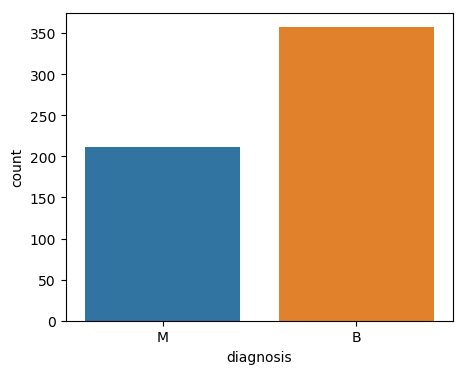

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot('diagnosis', data=breast);

<Figure size 400x300 with 0 Axes>

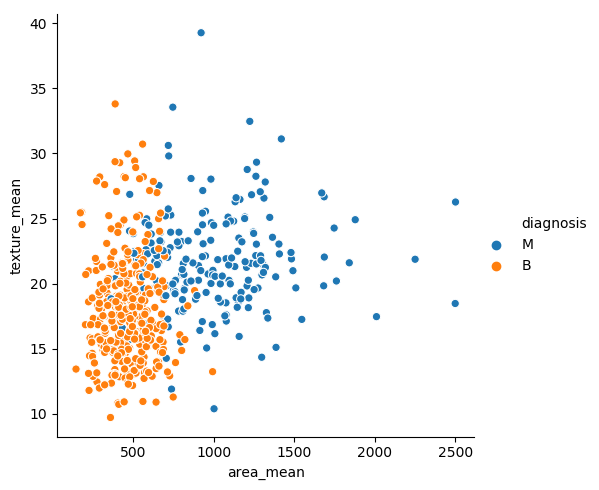

In [12]:
plt.figure(figsize=(4,3))
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast);

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
breast.diagnosis = np.where(breast.diagnosis=='M', 1, 0)
features = ['area_mean', 'area_worst']
x = breast[features]
y = breast.diagnosis

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.7, stratify=y, random_state = 1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator = DecisionTreeClassifier()) # base_estimator로 기본 분류기 지정
pred = clf.fit(X_train, y_train).predict(X_test)
print('Accuracy Score:', clf.score(X_test, y_test))

Accuracy Score: 0.9181286549707602


In [28]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pred),
            index=['True[0]', 'True[1]'],
            columns=['Pred[0]', 'Pred[1]'])

,Pred[0],Pred[1]
True[0],102,5
True[1],9,55


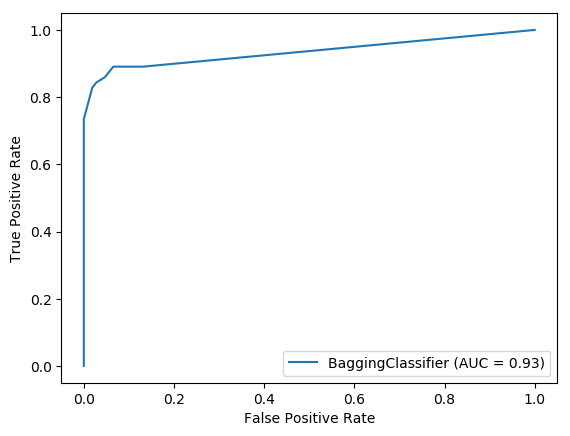

In [29]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [31]:
# ood_socre를 사용한 모델 평가
clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)
oob = clf_oob.fit(x, y).oob_score_
print(oob)

0.9015817223198594


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\ensemble\_bagging.py:643: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


#### 배깅-회귀

In [34]:
import pandas as pd
car = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [44]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car[features]
y=car.price
print(X.shape, y.shape)

(205, 13) (205,)


In [45]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True)
reg = reg.fit(X, y)
reg.oob_score_

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\ensemble\_bagging.py:1066: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.8274148950817193

#### 부스팅-분류

In [47]:
import pandas as pd
breast = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv")
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis'] = np.where(breast['diagnosis']=='M', 1, 0)
features = ["area_mean", "texture_mean"]
X = breast[features]
y = breast["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify =y, random_state =1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [53]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator=None) # None 이면 DecisionClassification을 수행함.
pred=clf.fit(x_train, y_train).predict(x_test)
print("정확도 : ", clf.score(x_test, y_test))

정확도 :  0.9122807017543859


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred=clf.predict(x_test)
test_cm=confusion_matrix(y_test, pred)
test_acc=accuracy_score(y_test, pred)
test_prc=precision_score(y_test, pred)
test_rcll=recall_score(y_test, pred)
test_f1=f1_score(y_test, pred)
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))

[[102   5]
 [ 10  54]]


정확도	91.23%
정밀도	91.53%
재현율	84.38%


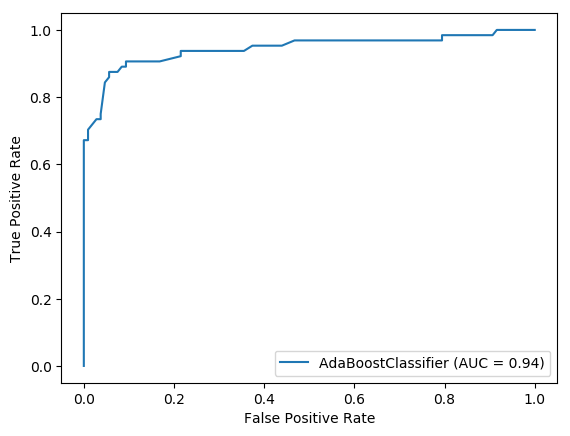

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, x_test, y_test)
plt.show()

In [64]:
# 변수 중요도
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)],
                               axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean         0.56
1  texture_mean         0.44


<BarContainer object of 2 artists>

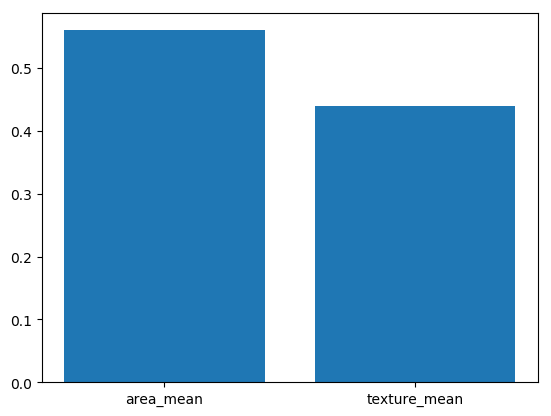

In [70]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)

#### 부스팅-회귀

In [72]:
car = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv")
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X=car_num[features]
y=car_num['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 13)
(62, 13)
(143,)
(62,)


In [73]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(base_estimator =None)
pred=reg.fit(x_train, y_train).predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	5867968.919
MAE	1832.931
RMSE	2422.389
ACC	90.28%


In [74]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.012407
1          carheight     0.004530
2          carlength     0.006185
3           carwidth     0.076259
4            citympg     0.018942
5   compressionratio     0.004215
6         curbweight     0.074898
7         enginesize     0.641856
8         highwaympg     0.037018
9         horsepower     0.071996
10           peakrpm     0.011606
11            stroke     0.012793
12         wheelbase     0.027293


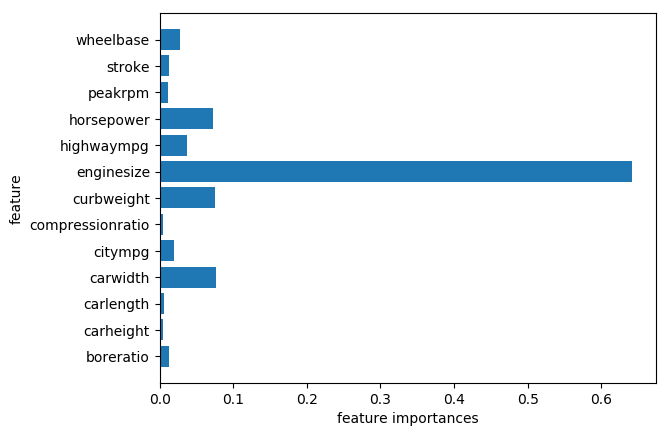

In [82]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align ='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()